In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import io 
%cd "data"
malldf=pd.read_csv("Mall_Customers.csv")

C:\Users\vraja\1.Python2\Imarticus\Rajesh_P\MyPrograms\data


In [3]:
malldf.info()
# No Null Rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              250 non-null    int64 
 1   Gender                  250 non-null    object
 2   Age                     250 non-null    int64 
 3   Annual Income (k$)      250 non-null    int64 
 4   Spending Score (1-100)  250 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 9.9+ KB


In [4]:
malldf.head(3)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6


In [5]:
malldf=malldf.drop('CustomerID',axis=1)

In [6]:
malldf.head(3)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6


In [7]:
malldf=pd.get_dummies(malldf,columns=['Gender'])

In [8]:
malldf.head(3)

,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
0,19,15,39,False,True
1,21,15,81,False,True
2,20,16,6,True,False


In [9]:
from sklearn.cluster import KMeans

In [10]:
# Elbow plot is based on Cluster number (X-axis) and WCSS - Within Cluster Sum Square(y-axis)

In [11]:
import warnings
warnings.filterwarnings("ignore")

In [12]:
# WCSS for differe k values ranging from (1,20)
# we are generrating multiples models for k 1 to 20 and get wcss for each model
# saved into a list
 
wcss_list=[]
for i in range(1,15):
#for i in range(1,20):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(malldf)
    wcss_list.append(kmeans.inertia_) # inertia_ is WCSS

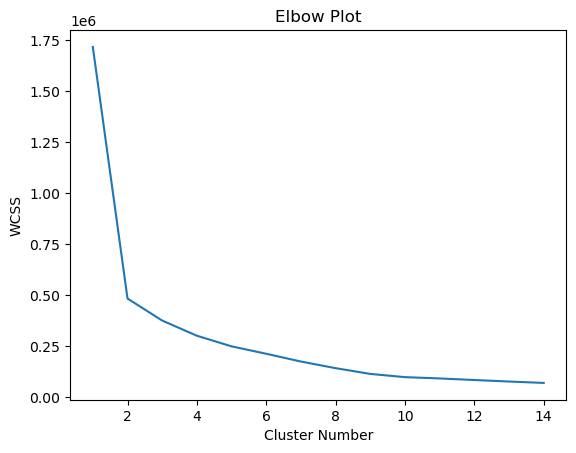

In [13]:
# Elbow plot
#plt.plot(range(1,20),wcss_list) - 7.5, 2.5
plt.plot(range(1,15),wcss_list)
plt.title("Elbow Plot")
plt.xlabel("Cluster Number")
plt.ylabel("WCSS")
plt.show()
# for 20 we get 0.5 so use 15 so that we get proper Elbow plot
# The elbow bend is on Cluster 2 so optimal cluster value is 2
# Means after Elbow plot variance is not changing much

In [14]:
clust_model2=KMeans(n_clusters=2).fit(malldf)

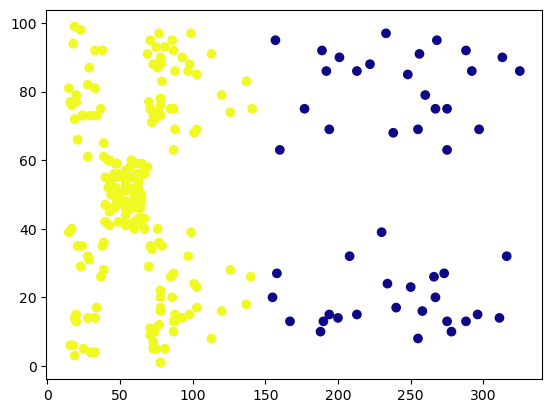

In [15]:
plt.scatter(malldf["Annual Income (k$)"],malldf["Spending Score (1-100)"],
            c=clust_model2.labels_,cmap="plasma")
# Clear cluster formation without any oeverlapping
# for 2 clusters no overlaps

In [16]:
# for 2 clusters no overlaps
# Based on graph observations (based on the centroids) 
# For 5 clusters also no overlap
clust_model5=KMeans(n_clusters=3).fit(malldf)

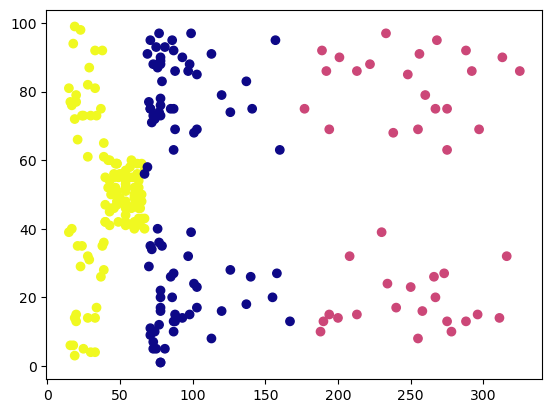

In [17]:
plt.scatter(malldf["Annual Income (k$)"],malldf["Spending Score (1-100)"],
            c=clust_model5.labels_,cmap="plasma")

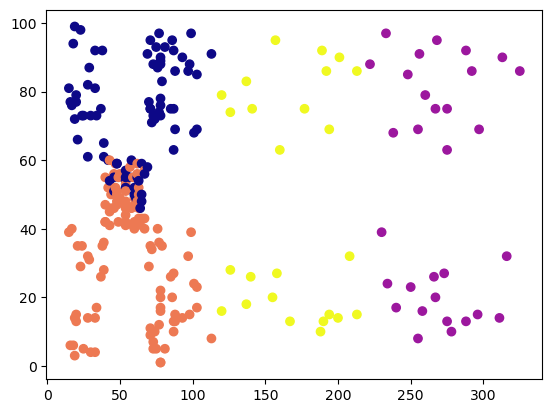

In [18]:
# 4 has slight overlap
clust_model=KMeans(n_clusters=4, random_state=42).fit(malldf)
plt.scatter(malldf["Annual Income (k$)"],malldf["Spending Score (1-100)"],
            c=clust_model.labels_,cmap="plasma")

In [19]:
clust_model2.cluster_centers_

array([[ 36.89583333, 239.6875    ,  50.41666667,   0.52083333,
          0.47916667],
       [ 38.87128713,  61.35148515,  50.2029703 ,   0.55445545,
          0.44554455]])

In [20]:
clust_model5.cluster_centers_

array([[ 36.65116279,  91.80232558,  50.51162791,   0.48837209,
          0.51162791],
       [ 36.69767442, 249.02325581,  51.20930233,   0.53488372,
          0.46511628],
       [ 40.43801653,  43.76033058,  49.7107438 ,   0.59504132,
          0.40495868]])

In [21]:
clust_model.cluster_centers_
# 4 centroids [Average Age, Average Anuual Income, Average Spending Score ...]

array([[ 28.82926829,  59.7804878 ,  73.43902439,   0.56097561,
          0.43902439],
       [ 37.16129032, 269.32258065,  51.77419355,   0.4516129 ,
          0.5483871 ],
       [ 46.29464286,  57.53571429,  33.21428571,   0.5625    ,
          0.4375    ],
       [ 36.88      , 168.12      ,  48.56      ,   0.56      ,
          0.44      ]])

In [22]:
# Silhoutte Score is a metric to evaluate the performance of clustering algorithm.
# It uses compactness of individual cluster(intra cluster distance) and seperation 
# (inter cluster distance) amongst clusters to measure overall performance of
# clustering algorithm. Ranges from -1 to 1.

# Closer to 1 indicates cluster formation is clear and no overlapping
# Closer to 0 or negative indicates Wrong cluster formation and Overlapping

In [23]:
from sklearn.metrics import silhouette_score

In [24]:
silhouette_score(malldf, clust_model.labels_)
# distane is closer. Generally above 0.50 or closer to 0.40 is good
# if it's less than 0.30 then atleast one cluster is overlapping.
# if it's zero all clusters are overlapping
# Negative means wrong clustering of observations

0.3224208356216427

In [25]:
silhoutte=[]
for i in range(2,15):
    kmeans=KMeans(n_clusters=i,random_state=42)
    kmeans.fit(malldf)
    labels=kmeans.labels_
    silhoutte.append(silhouette_score(malldf, kmeans.labels_))    

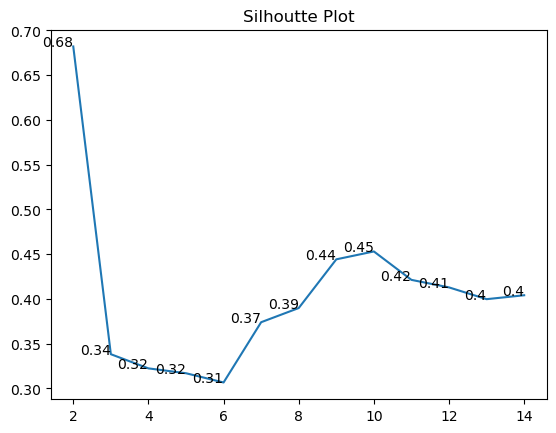

In [26]:
plt.plot(range(2,15),silhoutte)
plt.title("Silhoutte Plot")

for i, silhoutte in enumerate(silhoutte):
    plt.text(range(2,15)[i],silhoutte,round(silhoutte,2),ha="right")    

plt.show()

# Maximum is 0.45 is for 10 clusters 

In [27]:
malldf1=malldf

In [28]:
malldf1['cluster label']=clust_model.labels_

In [29]:
malldf1['cluster label'].value_counts()

cluster label
2    112
0     82
1     31
3     25
Name: count, dtype: int64